In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


#### Read the dataset

In [38]:
return_covariance_data = pd.read_excel(r'Return-Covariance-Data.xlsx',sheet_name=['Covariance matrix','Correlation matrix','Products of std deviations','ER and SD'])

In [39]:
ER_and_SD = return_covariance_data['ER and SD'].set_index('Assets')
Covariance_matrix = return_covariance_data['Covariance matrix'].set_index('Assets')
Correlation_matrix = return_covariance_data['Correlation matrix'].set_index('Assets')
Products_of_std_deviations = return_covariance_data['Products of std deviations'].set_index('Assets')

#### Generate monthly returns for 5 years

In [61]:
monthly_return = pd.DataFrame(data = np.zeros((60,8)), 
                  columns = Covariance_matrix.columns)
for i in range(60):
    monthly_return.loc[i] = np.random.multivariate_normal(ER_and_SD['Expected Return (%)'], Covariance_matrix.values)

Text(0, 0.5, 'Monthly Returns')

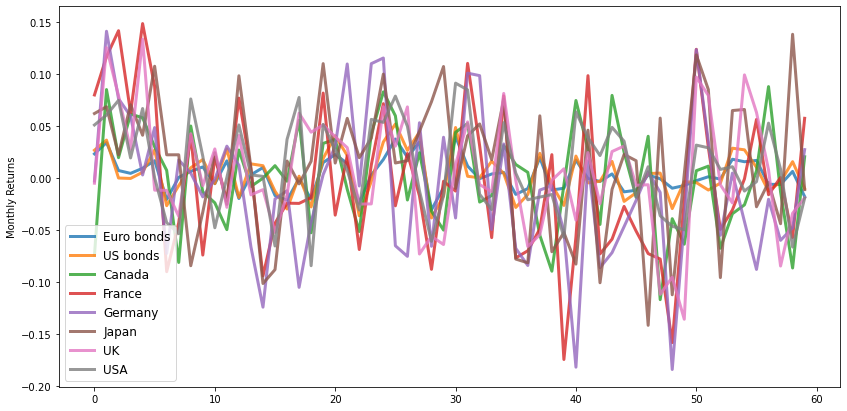

In [124]:
plt.figure(figsize=(14, 7))
for bonds in monthly_return.columns.values:
    plt.plot(monthly_return.index, monthly_return[bonds], lw=3, alpha=0.8,label=bonds)
plt.legend(fontsize=12)
plt.ylabel('Monthly Returns')

#### Q1. Calculate sample mean and the sample covariance matrix

In [113]:
sample_covariance_matrix = np.cov(monthly_return.values.transpose(),bias=True)
sample_mean = monthly_return.describe().loc['mean']

#### 可视化了一下actual covariance和sample covariance。提交时可以删除

<AxesSubplot:>

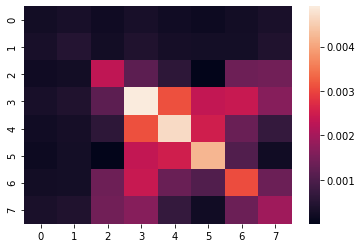

In [119]:
sn.heatmap(sample_covariance_matrix, fmt='g')

<AxesSubplot:>

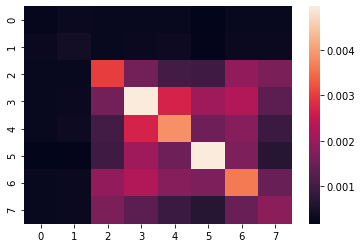

In [118]:
sn.heatmap(Covariance_matrix.values, fmt='g')

In [131]:
var_list = monthly_return.columns.values.tolist()

In [132]:
var_list

['Euro bonds', 'US bonds', 'Canada', 'France', 'Germany', 'Japan', 'UK', 'USA']